Canadian Mortgage Interest Rate vs. Covid-19 Infection Rate

Question: 
How did Covid-19 affect mortgage rates?

Methods to determine outcome:
Create multi plot graphs to compare changes in 2 selected Mortgage rates (Prime rate vs 5 Year Fixed)
Create line graph to represent the changes in Covid-19 cases over time (2020-2023)
Create scatterplots to visualize the comparison of Covid-19 cases to the 2 selected Mortgage rates.

In [102]:
#Import Dependancies
import pandas as pd
import pathlib as path
import matplotlib.pyplot as plt
import numpy as np

In [103]:
#Case Study Files
int_rate_path = "Output/interest_rate_cleaned.csv"
covid_case_path = "covid19_df.csv"

In [104]:
#Read the CSV Files
int_rate = pd.read_csv(int_rate_path)
covid_case = pd.read_csv(covid_case_path)

In [105]:
#Diplay first dataframe
int_rate

,Year,Prime rate,1 Year Conventional,3 Year Conventional,5 Year Conventional,1 Year Guaranteed,3 Year Guaranteed,5 Year Guaranteed,5 Year Fixed,Daily Interest Savings,Non-Chequable Savings
0,2005,4.25%,4.90%,5.60%,6.05%,1.43%,2.18%,2.78%,2.53%,0.75%,0.05%
1,2006,6.00%,6.32%,6.45%,6.60%,2.88%,3.03%,3.13%,2.88%,0.62%,0.05%
2,2007,6.00%,7.05%,7.30%,7.19%,2.98%,3.13%,3.30%,3.12%,0.50%,0.10%
3,2008,4.75%,6.95%,7.00%,7.15%,2.13%,2.73%,3.08%,2.95%,0.25%,0.10%
4,2009,2.25%,3.80%,4.45%,5.79%,0.28%,1.48%,1.98%,1.73%,0.25%,0.05%
5,2010,2.50%,3.55%,4.15%,5.42%,0.63%,1.43%,1.98%,1.85%,0.20%,0.05%
6,2011,3.00%,3.50%,4.35%,5.39%,1.00%,1.43%,1.98%,1.85%,0.15%,0.05%
7,2012,3.00%,3.20%,3.95%,5.24%,0.96%,1.13%,1.63%,1.45%,0.15%,0.05%
8,2013,3.00%,3.14%,3.73%,5.24%,0.78%,1.13%,1.63%,1.45%,0.15%,0.05%
9,2014,3.00%,3.14%,3.75%,4.79%,1.30%,1.13%,2.00%,1.45%,0.15%,0.05%


In [106]:
#Display second dataframe
covid_case

,reporting_year,Province_ID,Province,Province_French,date,reporting_week,update,totalcases,numtotal_last7,ratecases_total,...,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,Month,Month_Year,Month_Year_Province
0,2020,59,British Columbia,Colombie-Britannique,2020-02-01,5,1.0,1,1.0,0.02,...,0,0.02,0,0.14,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-British Columbia
1,2020,48,Alberta,Alberta,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Alberta
2,2020,47,Saskatchewan,Saskatchewan,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Saskatchewan
3,2020,46,Manitoba,Manitoba,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Manitoba
4,2020,35,Ontario,Ontario,2020-02-01,5,1.0,3,0.0,0.02,...,0,0.02,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Ontario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,2024,60,Yukon,Yukon,2024-01-27,4,0.0,4989,NaN,11393.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Yukon
3131,2024,61,Northwest Territories,Territoires du Nord-Ouest,2024-01-27,4,0.0,11511,NaN,25240.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Northwest Territories
3132,2024,62,Nunavut,Nunavut,2024-01-27,4,0.0,3531,NaN,8712.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Nunavut
3133,2024,99,Repatriated travellers,Voyageurs rapatriés,2024-01-27,4,NaN,13,0.0,NaN,...,0,NaN,NaN,0.00,NaN,0.00,NaN,Jan,Jan-2024,Jan-2024-Repatriated travellers


In [107]:
#Rename column from "reporting_year" to "Year" in order to merge for the second dataset
covid_case = covid_case.rename(columns={"reporting_year":"Year", "totalcases":"Total Cases"})
covid_case


,Year,Province_ID,Province,Province_French,date,reporting_week,update,Total Cases,numtotal_last7,ratecases_total,...,numdeaths_last14,ratetotal_last14,ratedeaths_last14,avgcases_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,Month,Month_Year,Month_Year_Province
0,2020,59,British Columbia,Colombie-Britannique,2020-02-01,5,1.0,1,1.0,0.02,...,0,0.02,0,0.14,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-British Columbia
1,2020,48,Alberta,Alberta,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Alberta
2,2020,47,Saskatchewan,Saskatchewan,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Saskatchewan
3,2020,46,Manitoba,Manitoba,2020-02-01,5,1.0,0,0.0,0.00,...,0,0.00,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Manitoba
4,2020,35,Ontario,Ontario,2020-02-01,5,1.0,3,0.0,0.02,...,0,0.02,0,0.00,0.00,0.00,0.00,Feb,Feb-2020,Feb-2020-Ontario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,2024,60,Yukon,Yukon,2024-01-27,4,0.0,4989,NaN,11393.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Yukon
3131,2024,61,Northwest Territories,Territoires du Nord-Ouest,2024-01-27,4,0.0,11511,NaN,25240.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Northwest Territories
3132,2024,62,Nunavut,Nunavut,2024-01-27,4,0.0,3531,NaN,8712.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Jan-2024,Jan-2024-Nunavut
3133,2024,99,Repatriated travellers,Voyageurs rapatriés,2024-01-27,4,NaN,13,0.0,NaN,...,0,NaN,NaN,0.00,NaN,0.00,NaN,Jan,Jan-2024,Jan-2024-Repatriated travellers


In [108]:
#Create a new clean dataframe
#Identify Columns needed to be used in the new dataframe
df = pd.DataFrame(covid_case)
selected_columns = ["Year", "Province", "Total Cases"]
newdf = df[selected_columns]
newdf

,Year,Province,Total Cases
0,2020,British Columbia,1
1,2020,Alberta,0
2,2020,Saskatchewan,0
3,2020,Manitoba,0
4,2020,Ontario,3
...,...,...,...
3130,2024,Yukon,4989
3131,2024,Northwest Territories,11511
3132,2024,Nunavut,3531
3133,2024,Repatriated travellers,13


In [109]:
#Combine data into one dataframe
covid_int_rate_df = pd.merge(int_rate, newdf, how = "outer", on = ["Year"])

In [110]:
#Display for preview
covid_int_rate_df

,Year,Prime rate,1 Year Conventional,3 Year Conventional,5 Year Conventional,1 Year Guaranteed,3 Year Guaranteed,5 Year Guaranteed,5 Year Fixed,Daily Interest Savings,Non-Chequable Savings,Province,Total Cases
0,2005,4.25%,4.90%,5.60%,6.05%,1.43%,2.18%,2.78%,2.53%,0.75%,0.05%,NaN,NaN
1,2006,6.00%,6.32%,6.45%,6.60%,2.88%,3.03%,3.13%,2.88%,0.62%,0.05%,NaN,NaN
2,2007,6.00%,7.05%,7.30%,7.19%,2.98%,3.13%,3.30%,3.12%,0.50%,0.10%,NaN,NaN
3,2008,4.75%,6.95%,7.00%,7.15%,2.13%,2.73%,3.08%,2.95%,0.25%,0.10%,NaN,NaN
4,2009,2.25%,3.80%,4.45%,5.79%,0.28%,1.48%,1.98%,1.73%,0.25%,0.05%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yukon,4989.0
3146,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Territories,11511.0
3147,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nunavut,3531.0
3148,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repatriated travellers,13.0


In [111]:
#Clean dataframe to make observation
#Identify Canada as unique value due to interest rates being Canada wide
clean_cov_int_rate_df = covid_int_rate_df.loc[covid_int_rate_df["Province"] =="Canada", :]
clean_cov_int_rate_df


,Year,Prime rate,1 Year Conventional,3 Year Conventional,5 Year Conventional,1 Year Guaranteed,3 Year Guaranteed,5 Year Guaranteed,5 Year Fixed,Daily Interest Savings,Non-Chequable Savings,Province,Total Cases
29,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,4.0
44,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,8.0
59,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,8.0
74,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,11.0
89,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,2023,6.95%,7.14%,6.54%,6.49%,3.25%,3.55%,3.75%,3.17%,0.01%,0.01%,Canada,4891635.0
3104,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4902209.0
3119,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4910310.0
3134,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4916277.0


In [112]:
#Remove initial index
clean_cov_int_rate_df = clean_cov_int_rate_df.reset_index(drop=True)
clean_cov_int_rate_df

,Year,Prime rate,1 Year Conventional,3 Year Conventional,5 Year Conventional,1 Year Guaranteed,3 Year Guaranteed,5 Year Guaranteed,5 Year Fixed,Daily Interest Savings,Non-Chequable Savings,Province,Total Cases
0,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,4.0
1,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,8.0
2,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,8.0
3,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,11.0
4,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2023,6.95%,7.14%,6.54%,6.49%,3.25%,3.55%,3.75%,3.17%,0.01%,0.01%,Canada,4891635.0
205,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4902209.0
206,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4910310.0
207,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4916277.0


In [113]:
#Drop NAN values
clean_cov_int_rate_df.dropna()

,Year,Prime rate,1 Year Conventional,3 Year Conventional,5 Year Conventional,1 Year Guaranteed,3 Year Guaranteed,5 Year Guaranteed,5 Year Fixed,Daily Interest Savings,Non-Chequable Savings,Province,Total Cases
0,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,4.0
1,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,8.0
2,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,8.0
3,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,11.0
4,2020,2.45%,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2023,6.95%,7.14%,6.54%,6.49%,3.25%,3.55%,3.75%,3.17%,0.01%,0.01%,Canada,4844754.0
201,2023,6.95%,7.14%,6.54%,6.49%,3.25%,3.55%,3.75%,3.17%,0.01%,0.01%,Canada,4856628.0
202,2023,6.95%,7.14%,6.54%,6.49%,3.25%,3.55%,3.75%,3.17%,0.01%,0.01%,Canada,4868996.0
203,2023,6.95%,7.14%,6.54%,6.49%,3.25%,3.55%,3.75%,3.17%,0.01%,0.01%,Canada,4880977.0


In [114]:
# Convert percentage strings to numerical values for the Prime Rate for Mortgage.
clean_cov_int_rate_df["Prime rate"] = clean_cov_int_rate_df["Prime rate"].str.rstrip('%').astype(float)
clean_cov_int_rate_df

,Year,Prime rate,1 Year Conventional,3 Year Conventional,5 Year Conventional,1 Year Guaranteed,3 Year Guaranteed,5 Year Guaranteed,5 Year Fixed,Daily Interest Savings,Non-Chequable Savings,Province,Total Cases
0,2020,2.45,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,4.0
1,2020,2.45,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,8.0
2,2020,2.45,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,8.0
3,2020,2.45,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,11.0
4,2020,2.45,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88%,0.01%,0.01%,Canada,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2023,6.95,7.14%,6.54%,6.49%,3.25%,3.55%,3.75%,3.17%,0.01%,0.01%,Canada,4891635.0
205,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4902209.0
206,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4910310.0
207,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4916277.0


In [115]:
#Convert percentage string to numerical values for 5 Year Fixed Mortgage.
clean_cov_int_rate_df["5 Year Fixed"] = clean_cov_int_rate_df["5 Year Fixed"].str.rstrip('%').astype(float)
clean_cov_int_rate_df

,Year,Prime rate,1 Year Conventional,3 Year Conventional,5 Year Conventional,1 Year Guaranteed,3 Year Guaranteed,5 Year Guaranteed,5 Year Fixed,Daily Interest Savings,Non-Chequable Savings,Province,Total Cases
0,2020,2.45,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88,0.01%,0.01%,Canada,4.0
1,2020,2.45,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88,0.01%,0.01%,Canada,8.0
2,2020,2.45,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88,0.01%,0.01%,Canada,8.0
3,2020,2.45,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88,0.01%,0.01%,Canada,11.0
4,2020,2.45,3.19%,3.89%,4.94%,0.55%,0.85%,1.13%,0.88,0.01%,0.01%,Canada,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2023,6.95,7.14%,6.54%,6.49%,3.25%,3.55%,3.75%,3.17,0.01%,0.01%,Canada,4891635.0
205,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4902209.0
206,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4910310.0
207,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,4916277.0


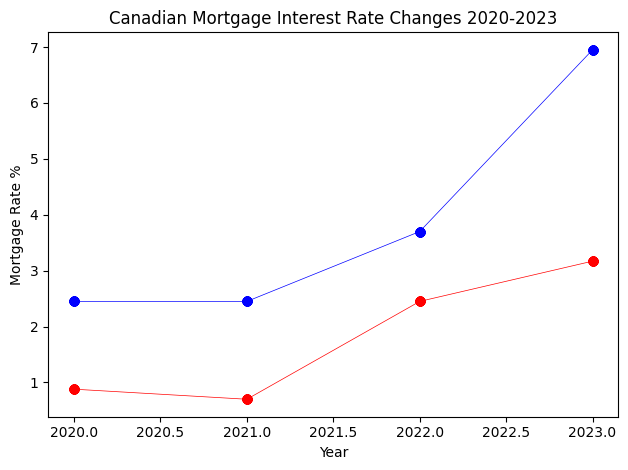

In [116]:
# Plotting Prime rate vs Year
plt.plot(clean_cov_int_rate_df["Year"], clean_cov_int_rate_df["Prime rate"], marker = "o", color = "b", linewidth = "0.5")
plt.plot(clean_cov_int_rate_df["Year"], clean_cov_int_rate_df["5 Year Fixed"], marker = "o", color = "r", linewidth = "0.5")
plt.xlabel("Year")
plt.ylabel("Mortgage Rate %")
plt.title("Canadian Mortgage Interest Rate Changes 2020-2023")
plt.tight_layout()
plt.savefig("Output_data/Prime_Rate_vs_5_Year_Fixed_Rate_lineplot.png")
plt.show()

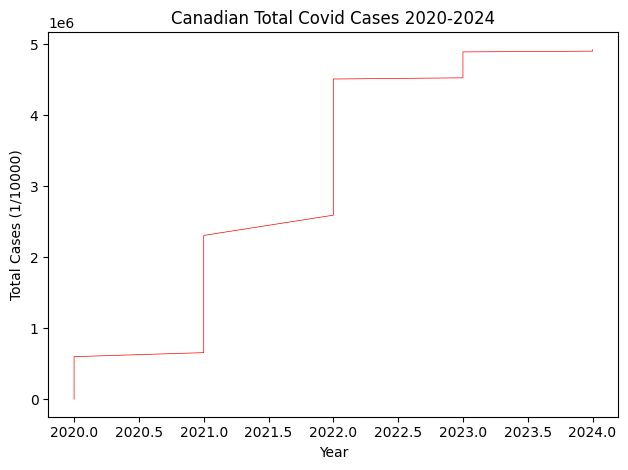

In [117]:
# Plotting Total Cases vs Year
plt.plot(clean_cov_int_rate_df["Year"], clean_cov_int_rate_df["Total Cases"], color = "r", linewidth = "0.5")
plt.xlabel("Year")
plt.ylabel("Total Cases (1/10000)")
plt.title("Canadian Total Covid Cases 2020-2024")
plt.tight_layout()
plt.savefig("Output_data/Total_Cases_vs_Year_lineplot.png")
plt.show()

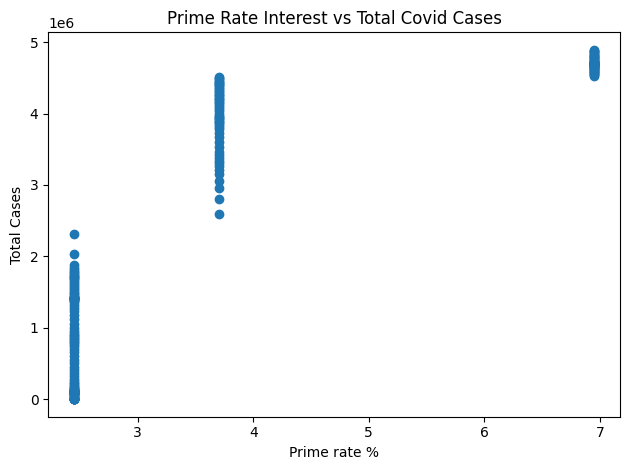

In [120]:
#Plotting Prime Rate vs Total Cases
plt.scatter(clean_cov_int_rate_df.iloc[:,1],clean_cov_int_rate_df.iloc[:,12])
plt.xlabel("Prime rate %")
plt.ylabel("Total Cases")
plt.title("Prime Rate Interest vs Total Covid Cases")
plt.tight_layout()
plt.savefig("Output_data/Prime_Rate_vs_Total_Cases_scatterplot.png")
plt.show()

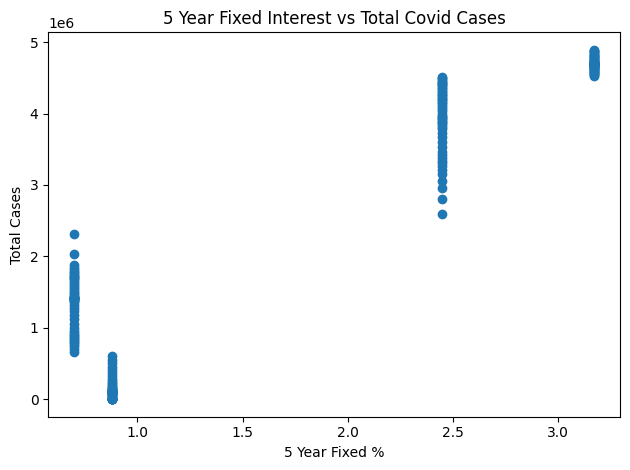

In [121]:
#Plotting 5 Year 
plt.scatter(clean_cov_int_rate_df.iloc[:,8],clean_cov_int_rate_df.iloc[:,12])
plt.xlabel("5 Year Fixed %")
plt.ylabel("Total Cases")
plt.title("5 Year Fixed Interest vs Total Covid Cases")
plt.tight_layout()
plt.savefig("Output_data/5_Year_Fixed_vs_Total_Cases_scatterplot.png")
plt.show()

Analysis:
This notebook concentrated on reviewing the correlation between Covid-19 cases and the potential affects it had on mortgage interest rates during the years 2020-2023 in Canada.
Due to the differences in the datasets we had to set create new dataframes in order to compare the data under the same format as one another.
Prime rate: The prime rate, or prime lending rate, is the interest rate a financial institution uses as a base to determine interest rates for loan products. Each financial institution sets its own prime rate, as a function of its cost of funding, which, in turn, is influenced by the target for the overnight rate set by the Bank of Canada.
Conventional mortgage: A conventional mortgage is a loan for no more than 80% of the appraised value or purchase price of the property. To qualify for a conventional mortgage, your down payment, or the cash you provide for the purchase price, must be at least 20% of the purchase price.
Guaranteed Investment Certificates: Guaranteed Investment Certificates (GICs) and term deposits are secured investments. This means that you get back the amount you invest at the end of your term. The key difference between a GIC and a term deposit is the length of the term. Term deposits generally have shorter terms than GICs.
Personal fixed term:  A fixed rate mortgage, simply put, is a mortgage where your interest rate and monthly payments stay the same for the duration of the term, whether it's 6 months, 1 year, 2 years, 3 years, 4 years, 5 years, 6 years, 7 years, or even 10 years.
Daily Interest Savings (balances over $100,000): The rates are typical rates quoted by the major institutions. When there are differences in the rate quoted by individual institutions, the most typical rate is taken.
Non-Chequable Deposits: are also known as Term Deposits that are made with a bank or financial institution for a fixed period, ranging from a few months to several years. These deposits cannot be withdrawn before the maturity period, and the bank pays a fixed interest rate on them.
Looking back we can see the rates and number of reported cases are comparatively different. They are as follows: Prime Rate - 2.45%, 1 Year Conventional - 3.19%, 3 Year Conventional - 3.89%, 5 Year Conventional - 4.94%, 1 Year Guaranteed - 0.55%, 3 Year Guaranteed - 0.85%, 5 Year Guaranteed - 1.13%, Daily Interest Savings - 0.01%, Non-Chequable Savings - 0.01%. The total number of cases at this time was 4 reported cases.
We can determine that the last comparable values are as follows: Prime Rate - 6.95%, 1 Year Conventional - 7.14%, 3 Year Conventional - 6.54%, 5 Year Conventional - 6.49%, 1 Year Guaranteed - 3.25%, 3 Year Guaranteed - 3.55%, 5 Year Guaranteed - 3.75%, Daily Interest Savings - 0.01%,	Non-Chequable Savings - 0.01% and the total number of reported cases was determined to be 4891635 reported cases Canada wide by the end of 2023.
By comparing the following we can see that 2 have not changed (Daily interest savings and Non-chequable savings). This can be from the fact that the bank pays back a percentage to these customers. We can calculate the differences: 4.5% increase, 3.95% increase, 1.55% increase, 2.70% increase, 2.70% increase, 2.62% increase, 2.29% increase. The difference in reported cases was a staggering 4921295 cases.
In the first figure we compared the Prime Rate and 5 Year Fixed rate vs the years Covid-19 was most prevelant(2020-2023). By creating a line plot showing 2 different plots, we came to the conclusion that the 2 interest rates studied went up over the timeframe.
For the second figure, we compared the columns of Total Cases vs Year. This visualization shows for 1 out of 10000 people. This presented the figure that as time went on the cases reported went up quite dramatically.
The final 2 visualizations are comparing the 2 interest rates studied and the number of Total Cases. In the first visualization it showed that as the number os reported cases went up, the percent of the Prime rate would go up as well. The final visualization showed a slight variation. In the beginning the rate for the 5 Year Fixed rate mortgage stayed realtivly low. This took a sudden turn as it approached the 25000 reported case number, the interest rate almost tripled going from below 1% up to 2.5%. This could have been due to some Canadians having reached then end or just starting off a new term for their mortgage.
In conclusion it is apparent that as the number of Covid-19 cases surged, the trend for the mortgage rates increased as well. 